## Polynomial

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('/Users/zhichengliu/Desktop/Valar.Ga/Self_Learning.nosync/数据/Udemy/Python/UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales', axis = 1)

In [5]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [6]:
y = df['sales']

In [7]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
polynomial_coverter = PolynomialFeatures(degree = 2, include_bias = False)

In [10]:
polynomial_coverter.fit(X)

PolynomialFeatures(include_bias=False)

In [11]:
polynomial_coverter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [12]:
# polynomial_coverter.fit_transform(X) #一步完成

In [13]:
poly_features = polynomial_coverter.transform(X)

In [14]:
poly_features.shape

(200, 9)

In [15]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [16]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [19]:
poly_features.shape

(200, 9)

In [17]:
polynomial_coverter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
test_predictions = model.predict(X_test)

In [43]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [32]:
MAE = mean_absolute_error(y_test, test_predictions)

In [33]:
MSE = mean_squared_error(y_test, test_predictions)

In [37]:
RMSE = np.sqrt(MSE)

In [38]:
MAE 

0.4896798044803488

In [39]:
MSE

0.44175055104033534

In [40]:
RMSE

0.6646431757268974

In [41]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [42]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [44]:
#1. Create different order polynomial X data
#2. Split that polynomial data for train/test
#3. Fit on the training data
#4. Report back the metrics on *both* the train and test results
#5. Plot these results （error vs poly order）

In [47]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree = d, include_bias= False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [48]:
train_rmse_errors

[1.7345941243293763,
 0.587957408529223,
 0.43393443569020673,
 0.35170836883993534,
 0.2509342963168562,
 0.20133513038009845,
 5.429519690630219,
 0.20829323347473921,
 0.17705794329531716]

In [49]:
test_rmse_errors

[1.5161519375993884,
 0.6646431757268974,
 0.5803286825163759,
 0.5077742631180222,
 2.575820709711998,
 4.417531343659344,
 1368.3537494947786,
 4031.580690396981,
 99797.38688330933]

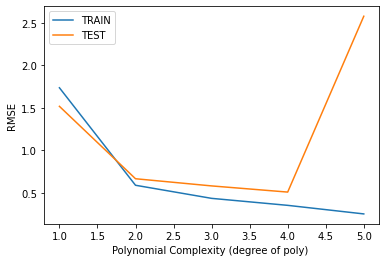

In [56]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity (degree of poly) ")
plt.ylabel("RMSE")
plt.legend();

In [57]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias= False)

In [66]:
final_model = LinearRegression()


In [68]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [71]:
from joblib import dump, load

In [72]:
dump(final_model, 'final_poly_model.joblib') 

['final_poly_model.joblib']

In [73]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [77]:
loaded_converter = load('final_converter.joblib')

In [78]:
loaded_model = load('final_poly_model.joblib')

In [76]:
campaign = [[149,22,12]]

In [79]:
loaded_converter.fit_transform(campaign)

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [80]:
loaded_converter.fit_transform(campaign).shape

(1, 19)

In [81]:
transformed_data = loaded_converter.fit_transform(campaign)

In [82]:
loaded_model.predict(transformed_data)

array([14.64501014])